In [1]:
import gym
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

In [9]:
env = gym.make('CartPole-v0')
gamma = 1
n_episodes = 2000
max_step = 1000
eps = 0.0001
gamma_pwr = gamma ** np.arange(max_step)

In [10]:
device = 'cuda:0'
net = nn.Sequential(
                    #nn.Linear(128, 128),
                    #nn.LeakyReLU(0.01),
                    nn.Linear(4, 64),
                    nn.LeakyReLU(0.01),
                    nn.Linear(64, 2),
                    nn.Softmax()
                    )
net.to(device)
optimizer = torch.optim.Adam(net.parameters(), lr=3e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 5, gamma=0.95)

In [11]:
total_rewards = []
freq = max(n_episodes // 20, 1)

In [12]:
for episode in range(n_episodes):
    state = torch.tensor(env.reset(), dtype=torch.float32).to(device)
    logs = []
    rewards = []
    for step in range(max_step):
        policy = net(state)
        #if step % 1000 == 0:
        #    print('max policy:', max(policy))
        q = np.random.choice(np.arange(2), p=[eps, 1 - eps])
        if q:
            action = np.random.choice(np.arange(2), p=policy.cpu().detach().numpy())
        else:
            action = np.random.randint(2)
        log = torch.log(policy[action] + 1e-6)
        #print(log)
        logs.append(log)
        state, reward, done, info = env.step(action)
        state = torch.tensor(state, dtype=torch.float32).to(device)
        
        rewards.append(reward)
        if done:
            break
    T = len(rewards)
    #print(rewards[-1])
    rewards = np.array(rewards)
    total_rewards.append(rewards.sum())
    G = []
    for t in range(T):
        g = (gamma_pwr[t:T] * rewards[t:]).sum()
        G.append(g)
    grads = 0
    for log, g in zip(logs, G):
        grads -= g * log
    
    optimizer.zero_grad()
    grads.to(device).backward()
    optimizer.step()
    scheduler.step()
    if not episode % freq:
        print('Episode: {}/{} || Reward: {}  Steps: {}'.format(episode, n_episodes, total_rewards[-1], T))
        print('grad:', grads)

Episode: 0/2000 || Reward: 17.0  Steps: 17
grad: tensor(112.5616, device='cuda:0', grad_fn=<SubBackward0>)
Episode: 100/2000 || Reward: 35.0  Steps: 35
grad: tensor(423.4278, device='cuda:0', grad_fn=<SubBackward0>)
Episode: 200/2000 || Reward: 41.0  Steps: 41
grad: tensor(514.0794, device='cuda:0', grad_fn=<SubBackward0>)
Episode: 300/2000 || Reward: 59.0  Steps: 59
grad: tensor(980.8080, device='cuda:0', grad_fn=<SubBackward0>)
Episode: 400/2000 || Reward: 94.0  Steps: 94
grad: tensor(2647.7998, device='cuda:0', grad_fn=<SubBackward0>)
Episode: 500/2000 || Reward: 39.0  Steps: 39
grad: tensor(475.2009, device='cuda:0', grad_fn=<SubBackward0>)
Episode: 600/2000 || Reward: 68.0  Steps: 68
grad: tensor(1276.7083, device='cuda:0', grad_fn=<SubBackward0>)
Episode: 700/2000 || Reward: 48.0  Steps: 48
grad: tensor(743.3273, device='cuda:0', grad_fn=<SubBackward0>)
Episode: 800/2000 || Reward: 48.0  Steps: 48
grad: tensor(734.3997, device='cuda:0', grad_fn=<SubBackward0>)
Episode: 900/2000 |

In [14]:
avg_rewards = [np.mean(total_rewards[t-10:t]) for t in range(10, len(total_rewards))]

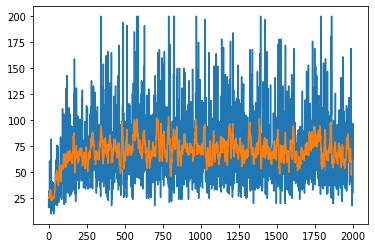

In [15]:
plt.plot(total_rewards)
plt.plot(avg_rewards);

In [7]:
np.mean(total_rewards)

22.5735

In [8]:
next(net.parameters())

Parameter containing:
tensor([[-4.1884e-01, -1.8878e-01,  2.9753e-01, -3.7368e-01],
        [ 4.6705e-01,  4.0870e-01,  1.4038e-01, -2.1464e-02],
        [ 1.2787e-01,  4.7567e-01,  7.7610e-02,  4.1112e-01],
        [-4.0212e-01, -2.4884e-01,  4.9184e-01, -1.1909e-01],
        [ 2.5931e-01, -7.4385e-02, -4.5156e-01,  1.2345e-01],
        [-3.7395e-01,  1.7197e-01, -3.6769e-01,  7.7291e-02],
        [ 3.4639e-01, -2.9881e-01,  3.9714e-02, -2.5525e-01],
        [ 4.3013e-01, -1.5760e-01, -1.5541e-01,  2.9734e-01],
        [ 3.6142e-01, -3.5953e-01, -3.7495e-02, -3.9697e-01],
        [ 3.1170e-01, -3.2689e-01,  7.0229e-03, -4.6546e-01],
        [-1.7376e-01, -1.2578e-01,  5.2074e-01, -2.2207e-01],
        [ 7.2147e-02,  5.4760e-02,  2.0302e-01, -2.0425e-01],
        [-4.6088e-01, -1.7145e-01,  1.7742e-01, -7.7423e-02],
        [ 2.3912e-01, -1.8511e-01,  3.0443e-01, -4.2147e-01],
        [-2.1130e-01,  5.2469e-02,  2.1838e-02, -4.8288e-01],
        [ 2.3506e-01,  7.8276e-02, -3.9278e-01, 